In [0]:
import numpy as np
import matplotlib.pyplot as plt

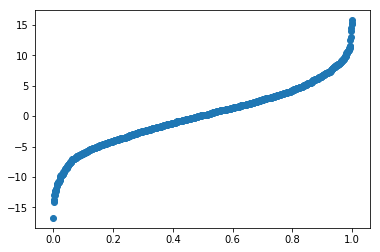

In [0]:
u=np.random.randn(1000,)*5
#print u
u.sort()
#print u
t=np.linspace(0,1,1000)
#print t
plt.scatter(t,u)
plt.show()

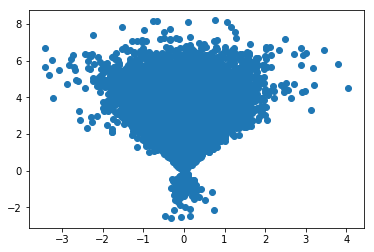

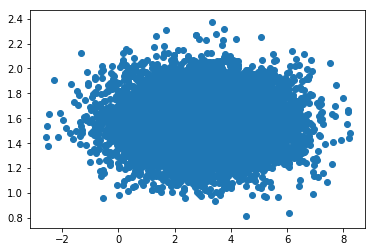

In [0]:
r=np.random.randn(10000,)*1.5+3
theta=np.random.randn(10000,)*np.pi/16+np.pi/2
x=r*np.cos(theta)
y=r*np.sin(theta)
plt.scatter(x,y)
plt.show()

plt.scatter(r,theta)
plt.show()

#Independent on Current State

[0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0.]


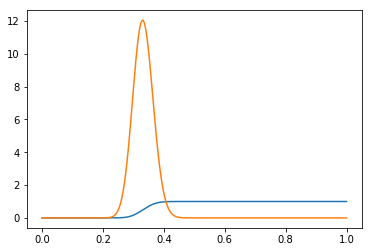

In [0]:
def beta(x,a,b):
  #Incomplete Beta Function
  return x**int(a)*(1-x)**int(b)/integral(0.,1,1000,a,b)
def integral(lb,ub,n,a,b):
  #Definitions of Trapezoid
  stepSize=float((ub-lb)/n)		#Height
  x=np.linspace(lb,ub,n+1)		#Location
  y=float(2*np.sum(x**a*(1-x)**b))		#=[2*sum(3i^2) for i in x]
  y-=(lb**a*(1-lb)**b+ub**a*(1-ub)**b)			#Subtracting Fenceposts (only do this in master node)
  y*=stepSize/2			#Time Height/2
  #print y
  return y

ploss=0.3
n=200
recv=np.floor(np.random.rand(n,)+ploss)
print recv
dom=np.linspace(0,1,1000)
total=int(np.sum(recv))
fx=beta(dom,total,n-total)
beta_cdf=np.zeros_like(dom)
for k in range(len(dom)):
  beta_cdf[k]=integral(0.,dom[k],1000,total,n-total)/integral(0.,1.,1000,total,n-total)
plt.plot(dom,beta_cdf)
plt.plot(dom,fx)
plt.show()

# Markov Jump Process

In [0]:
ploss=0.3
n=200
recv=np.floor(np.random.rand(n+1,)+ploss)
# print recv
dom=np.linspace(0,1,1000)
total=int(np.sum(recv))-recv[0]
# fx=beta(dom,total,n-total)
# beta_cdf=np.zeros_like(dom)
# for k in range(len(dom)):
#   beta_cdf[k]=integral(0.,dom[k],1000,total,n-total)/integral(0.,1.,1000,total,n-total)
# plt.plot(dom,beta_cdf)
# plt.plot(dom,fx)
# plt.show()
state=recv[0]
drecv=recv[1:]-recv[:-1]
totals=[np.sum(drecv==-1),np.sum(drecv==0),np.sum(drecv==1)]
print totals
print total
## tt=[[0,-1],[1,0]]
totals_mat=np.array([[total-totals[2],totals[0]],[totals[2],n-total-totals[0]]])
print totals_mat


[42, 116, 42]
58.0
[[ 16.  42.]
 [ 42. 100.]]


# Latent Parameter Inference using Beta Prior

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


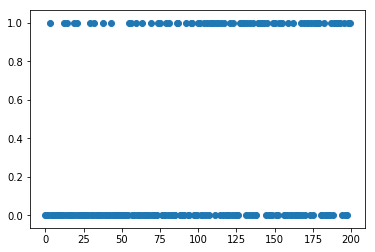

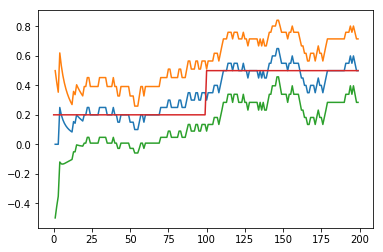

In [0]:
ploss=[0.2,0.5]
data1=np.floor(np.random.rand(100,)+ploss[0])
data2=np.floor(np.random.rand(100,)+ploss[1])
data=np.concatenate([data1,data2])
mu=np.zeros_like(data)
sd=np.zeros_like(data)
N=20
for k in range(len(data)):
  if k<N:
    a=np.sum(data[:k])+1
    b=k-a+1
    mu[k]=(a-1)/k
    sd[k]=np.sqrt(a*b/(a+b)**2/(a+b+2))
  else:
    a=np.sum(data[k-N:k])+1
    b=N-a-1
    mu[k]=(a-1)/N
    sd[k]=np.sqrt(a*b/(a+b)**2/(a+b+2))

plt.scatter(range(len(data)),data)
plt.show()

plt.plot(mu)
plt.plot(mu+2*sd)
plt.plot(mu-2*sd)
plt.plot(np.concatenate([ploss[0]*np.ones(100,),ploss[1]*np.ones(100,)]))
plt.show()

In [0]:
print sd

[ 0.          0.25        0.21081851  0.20412415  0.18516402  0.03125
  0.03125     0.          0.03125     0.04166667  0.04166667  0.03125
  0.03125     0.03125     0.03125     0.03125     0.04166667  0.03125
  0.03125     0.03125     0.04166667  0.04166667  0.04166667  0.03125
  0.03125     0.04166667  0.04166667  0.03125     0.04166667  0.04166667
  0.04166667  0.03125     0.03125     0.03125     0.03125     0.03125
  0.04166667  0.03125     0.03125     0.03125     0.03125     0.03125
  0.03125     0.03125     0.03125     0.03125     0.03125     0.03125
  0.03125     0.04166667  0.04166667  0.03125     0.03125     0.03125
  0.04166667  0.04166667  0.03125     0.04166667  0.03125     0.03125
  0.          0.          0.03125     0.03125     0.03125     0.04166667
  0.04166667  0.04166667  0.03125     0.03125     0.03125     0.03125
  0.03125     0.03125     0.03125     0.03125     0.03125     0.03125
  0.03125     0.03125     0.03125     0.03125     0.03125     0.03125
  0.03125     